##### Курсовая работа
## Анализ больших данных с использованием случайных лесов

Смирнова А.С.

группа 4411


 <hr style="border-color: black;"> 

Общий схематичный вид случайного леса

![title](random_forest_img_3.png "ShowMyImage")

Разделение данных (подвыборка для каждого дерева, также обычно используется подвыборка признаков) при построении случайного леса

![title](random_forest_img_2.png "ShowMyImage")

<b> Глоссарий </b>:

- фича (от feature) - признак объекта, независимая переменная

- таргет (от target) - целевое значение, зависимая переменная

- датасет - первоначальная выборка, данные 

##### Импорт необходимых библиотек

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sn

import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.figure_factory as ff

##### Загрузка данных из csv файла
Данные по клиентам компании, у которых таргет - собирается ли климент отказаться от услуг компании или нет

In [14]:
df = pd.read_csv('./train_25.csv')

##### Анализ и предобработка данных

Информация по типу каждого признака и количеству пропущенных значений

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Пропущенных значений нет, 19 фич, таргет  - Churn

Но TotalSpent почему-то строка, нужно преобразовать в численный тип

Для ознакомления с данными можно вывести 10 первых объектов:

In [16]:
df.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


Преобразование фичи TotalSpent к численному типу, замена пробелов нулями и приведение "No internet service" к просто "No" 

In [17]:
df = df.replace(['', ' '],'0')
df['TotalSpent'] = df['TotalSpent'].astype('float64')
df.replace('No internet service','No', inplace=True)

Ознакомление с преобразованными данными

In [18]:
df

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [19]:
# числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Распределение числовых фич и таргета

Как видно, данные не сбалансированны, но для деревьев это не критично

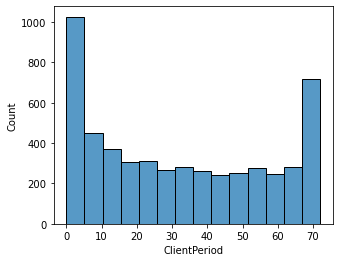

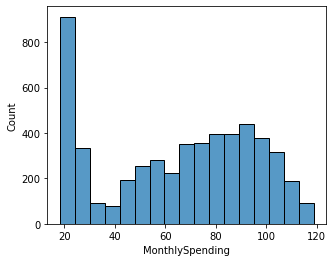

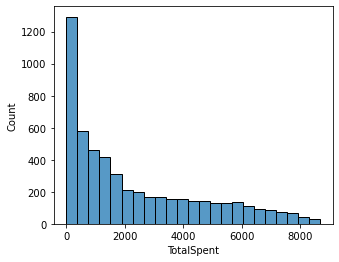

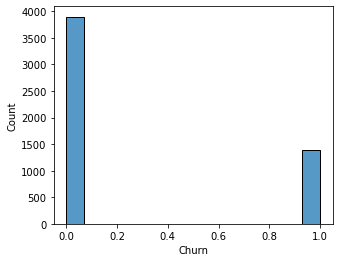

In [39]:
for col in (num_cols+[target_col]):
    plt.figure(figsize = (5,4))
    ax = sn.histplot(data=df, x = col)
    plt.show()

Корреляционная матрица числовых фич и таргета

Видно, что общие расходы коррелируют с периодом жизни клиента, что логично. Расходы за месяц и общие аналогично

Можно было бы из этих трех что-нибудь убрать, регрессию с регуляризацией L1 запустить или руками сделать

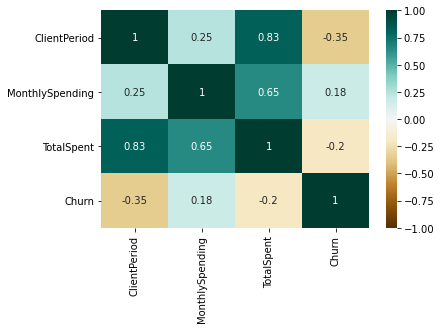

In [29]:
sn.heatmap(df[num_cols+[target_col]].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

Распределение категориальных фич

16


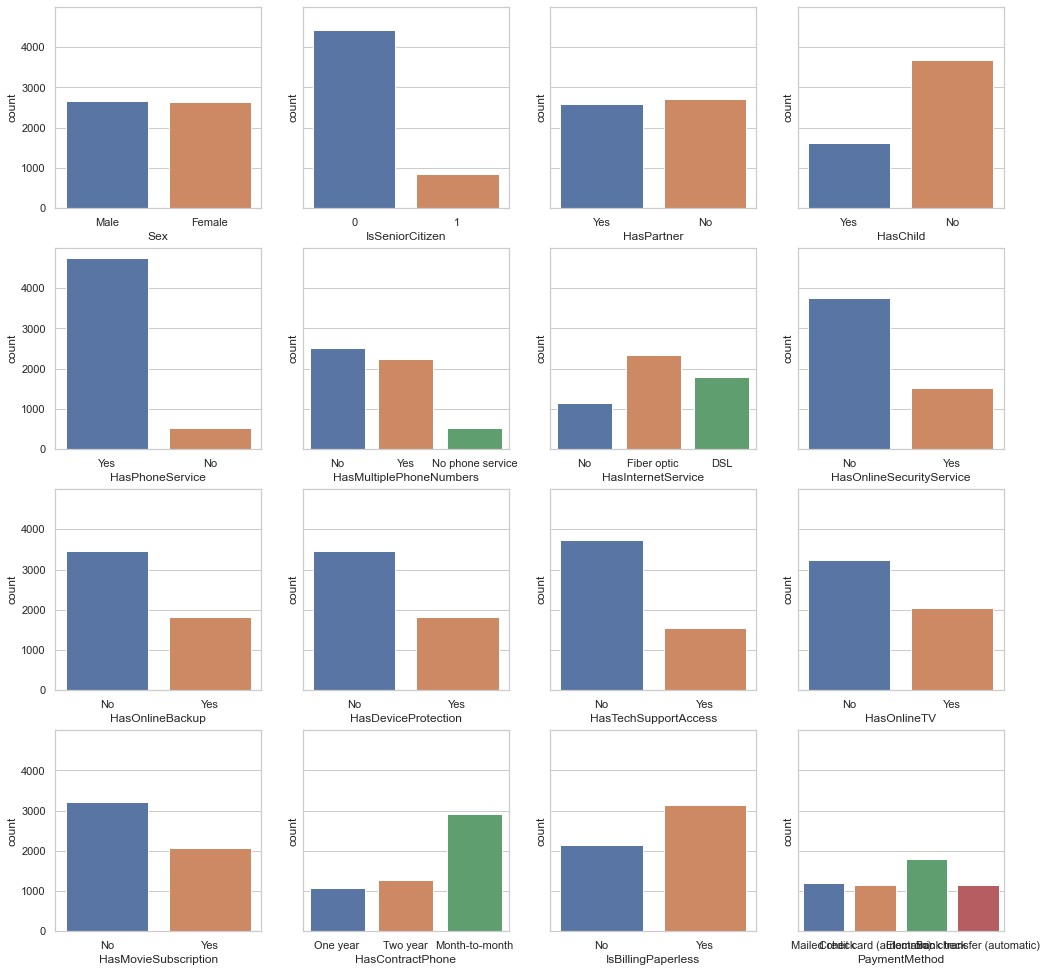

In [52]:
sn.set_theme(style="whitegrid")
categor = len(cat_cols)
print(categor)
fig, axes = plt.subplots(4, 4, figsize=(17, 17), sharey=True)
for i in range(len(cat_cols)):
    sn.countplot(x=cat_cols[i], data=df, ax=axes[i//4, i%4])

In [54]:
list(df['PaymentMethod'].unique())

['Mailed check',
 'Credit card (automatic)',
 'Electronic check',
 'Bank transfer (automatic)']

Как видно, распределения, в том числе целевой переменной, неравномерны. Но ансамблевые алгоритмы устойчивы к непропорциональным данным, поэтому дополнительных действий можно не предпринимать

Также можно визуально оценить распределение категориальных фич относительно таргета:

16


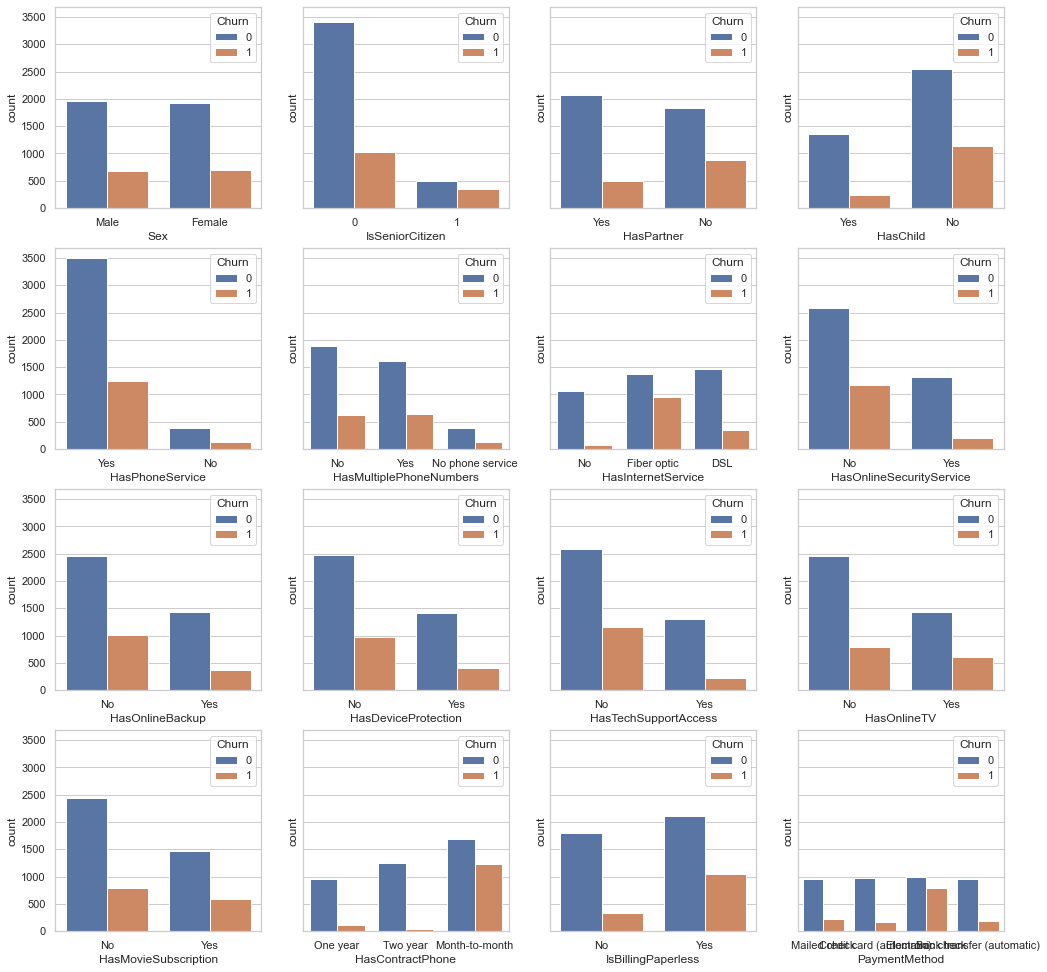

In [55]:
sn.set_theme(style="whitegrid")
categor = len(cat_cols)
print(categor)
fig, axes = plt.subplots(4, 4, figsize=(17, 17), sharey=True)
for i in range(len(cat_cols)):
    sn.countplot(x=cat_cols[i], data=df, ax=axes[i//4, i%4],hue = target_col)

В целом всё достаточно равномерно

Кодировка категориальных фич для модели

Для кодировки категориальных фич используется LabelEncoder (замечание: если строить регрессию, то нужно OneHot, иначе всё уедет) - то есть просто нумерация значений и замена их номерами

In [56]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_enc = df.copy()

for col in cat_cols:
    df_enc[col] = labelencoder.fit_transform(df_enc[col])

df_enc.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,1,0,1,1,1,0,2,0,0,0,0,0,0,1,0,3,0
1,72,25.85,1872.20,1,0,1,0,1,2,2,0,0,0,0,0,0,2,0,1,0
2,1,75.90,75.90,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,2,1
3,32,79.30,2570.00,0,1,1,0,1,2,1,0,0,1,0,0,0,0,0,3,0
4,60,115.25,6758.45,0,0,1,1,1,2,1,1,1,1,1,1,1,2,0,1,0


Корреляция с кодированными фичами (они же теперь числа и корреляция может быть видна, если она есть)

In [57]:
df_enc[cat_cols].corrwith(df_enc[target_col])

Sex                        -0.008325
IsSeniorCitizen             0.156872
HasPartner                 -0.148347
HasChild                   -0.163609
HasPhoneService             0.010849
HasMultiplePhoneNumbers     0.037866
HasInternetService         -0.051106
HasOnlineSecurityService   -0.182871
HasOnlineBackup            -0.088003
HasDeviceProtection        -0.068752
HasTechSupportAccess       -0.165618
HasOnlineTV                 0.059193
HasMovieSubscription        0.050521
HasContractPhone           -0.395705
IsBillingPaperless          0.194040
PaymentMethod               0.108666
dtype: float64

##### Импорт модели случайного леса и метрик для оценки качества

Используется Рандомный лес, оценивать будем точностью и rocauc (вероятности + значения)

Кроме того, можно рассчитать точность - accuracy=  (TP+TN)/(TP+TN+FP+FN)

Импорт:

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

Разделение данных на тестовую и обучающую подвыборки

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df_enc[feature_cols], 
                                                    df_enc[target_col], 
                                                    test_size=0.2, 
                                                    random_state=33)

Размеры тестовой и обучающей выборок

In [51]:
print(X_train.shape, X_test.shape)

(4225, 19) (1057, 19)


Обучение с гиперпараметрами по умолчанию

In [79]:
model =  RandomForestClassifier(random_state=1) 

model.fit(X_train, y_train) # обучение 
y_pred = model.predict(X_test) # предсказание  

print("Accuracy train = {:.3f}".format(accuracy_score(y_train, model.predict(X_train))))
print("Accuracy test = {:.3f}\n".format(accuracy_score(y_test, model.predict(X_test))))

print("ROC-AUC train = {:.3f}".format(roc_auc_score(y_train, model.predict(X_train))))
print("ROC-AUC test = {:.3f}\n".format(roc_auc_score(y_test, model.predict(X_test))))

print("ROC-AUC proba train = {:.3f}".format(roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])))
print("ROC-AUC proba test = {:.3f}".format(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])))

Accuracy train = 0.998
Accuracy test = 0.790

ROC-AUC train = 0.998
ROC-AUC test = 0.693

ROC-AUC proba train = 1.000
ROC-AUC proba test = 0.827


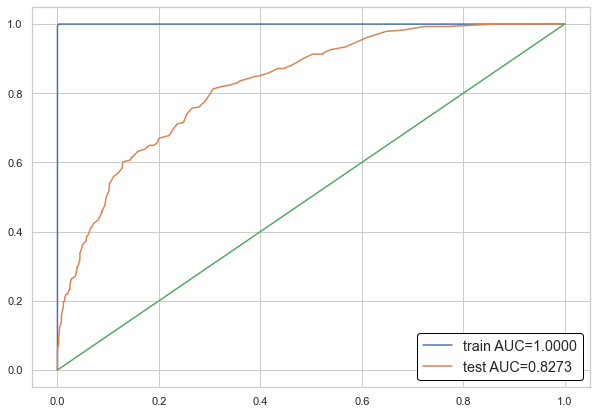

In [86]:
plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, model.predict_proba(X_train)[:, 1])[:2], label='train AUC={:.4f}'
         .format(roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])))
plt.plot(*roc_curve(y_test, model.predict_proba(X_test)[:, 1])[:2], label='test AUC={:.4f}'
         .format(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Подбор параметров получше 

In [119]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(RandomForestClassifier(random_state=1) ,
                    param_grid = { 'n_estimators': [10, 50, 150, 200, 250],
                   'criterion': ['gini', 'entropy'],
                   'max_depth': [10, 50, None],
                   'min_samples_split': [2, 10],
                   'min_samples_leaf': [1, 5],
                   'max_features': ['auto', 'log2']}, cv=4, scoring='accuracy', n_jobs=16, verbose=6)
grid.fit(X_train, y_train)
grid.best_score_

Fitting 4 folds for each of 240 candidates, totalling 960 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    4.3s
[Parallel(n_jobs=16)]: Done 232 tasks      | elapsed:    7.4s
[Parallel(n_jobs=16)]: Done 345 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done 482 tasks      | elapsed:   15.9s
[Parallel(n_jobs=16)]: Done 645 tasks      | elapsed:   21.9s
[Parallel(n_jobs=16)]: Done 832 tasks      | elapsed:   29.3s
[Parallel(n_jobs=16)]: Done 960 out of 960 | elapsed:   34.4s finished


0.8054445382156474

Качество с новыми гиперпараметрами

In [123]:
print("Accuracy test = {:.3f}\n".format(accuracy_score(y_test, grid.predict(X_test))))
print("ROC-AUC test = {:.3f}\n".format(roc_auc_score(y_test, grid.predict(X_test))))

Accuracy test = 0.805

ROC-AUC test = 0.705



Оптимальные параметры получились такими:

In [121]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

Можно построить график зависимости точности от количества деревьев 

In [136]:
predicts_test = []
predicts_train = []

for i in range(1, 300, 1):
    model_v2 =  RandomForestClassifier(random_state=1,
                                   criterion = 'gini',
                                   max_depth = 10,
                                   max_features = 'auto',
                                   min_samples_leaf = 1,
                                   min_samples_split = 10,
                                   n_estimators = i) 

    model_v2.fit(X_train, y_train)
    predicts_train.append(accuracy_score(y_train, model_v2.predict(X_train)))
    predicts_test.append(accuracy_score(y_test, model_v2.predict(X_test)))

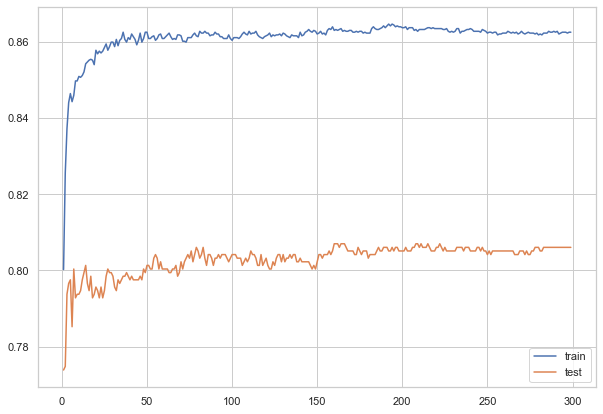

In [140]:
plt.figure(figsize=(10,7))
plt.plot(range(1, 300, 1), predicts_train, label='train')
plt.plot(range(1, 300, 1), predicts_test, label='test')
plt.legend()
plt.show()

##### Для сравнения, построиим модель градиентного бустинга (тоже ансамблевый алгоритм ML)

In [154]:
import catboost as catb

model_boost = catb.CatBoostClassifier(cat_features=cat_cols, silent=True)

X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(df[feature_cols], 
                                                    df[target_col], 
                                                    test_size=0.2, 
                                                    random_state=33)
model_boost.fit(X_train_boost, y_train_boost)

In [155]:
print("ROC-AUC test = {:.3f}".format(roc_auc_score(y_test_boost, model_boost.predict(X_test_boost))))
print("ROC-AUC proba test = {:.3f}".format(roc_auc_score(y_test_boost, model_boost.predict_proba(X_test_boost)[:,1])))
print("Accuracy test = {:.3f}".format(accuracy_score(y_test_boost, model_boost.predict(X_test_boost))))

ROC-AUC test = 0.712
ROC-AUC proba test = 0.842
Accuracy test = 0.799


Как видно, уже с гиперпараметрами по умолчанию градиентный бустинг дает такое же или лучшее качество в сравнении со случайным лесом 